In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor # 다중공선성 패키지 불러오기
from sklearn.linear_model import LinearRegression # sklearn 선형회귀 모형 -> 변수 선택법을 위함
from sklearn.feature_selection import RFE # 변수 선택법 (후진 제거법)
from sklearn.preprocessing import scale # 데이터 scale

ds_DIA = pd.read_csv("./Practice data/DIABETEST.CSV")
ds_DIA.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


# 분석에 필요한 데이터 구성하기
- Y가 사라진 것을 확인

In [14]:
# 목표변수, 설명변수 역할 지정
ds_DIA_y = ds_DIA["Y"]
ds_DIA_x= ds_DIA.drop("Y",axis=1,inplace =False)

print("목표변수 데이터 크기: {}".format(ds_DIA_y.shape))
print("설명변수 데이터 크기: {}",format(ds_DIA_x.shape))
ds_DIA.head()

for i in range(ds_DIA["GENDER"].count()):
    if ds_DIA["GENDER"][i] == 2:
        ds_DIA["GENDER"][i] = 0

목표변수 데이터 크기: (442,)
설명변수 데이터 크기: {} (442, 10)


In [15]:
# 절편 추가
ds_DIA_x_const = sm.add_constant(ds_DIA_x)
ds_DIA_x_const.head()

,const,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,1.0,59,0,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,1.0,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,1.0,72,0,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,1.0,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,1.0,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


# 2. 변수 간의 경향성 파악 - 그래프 분석

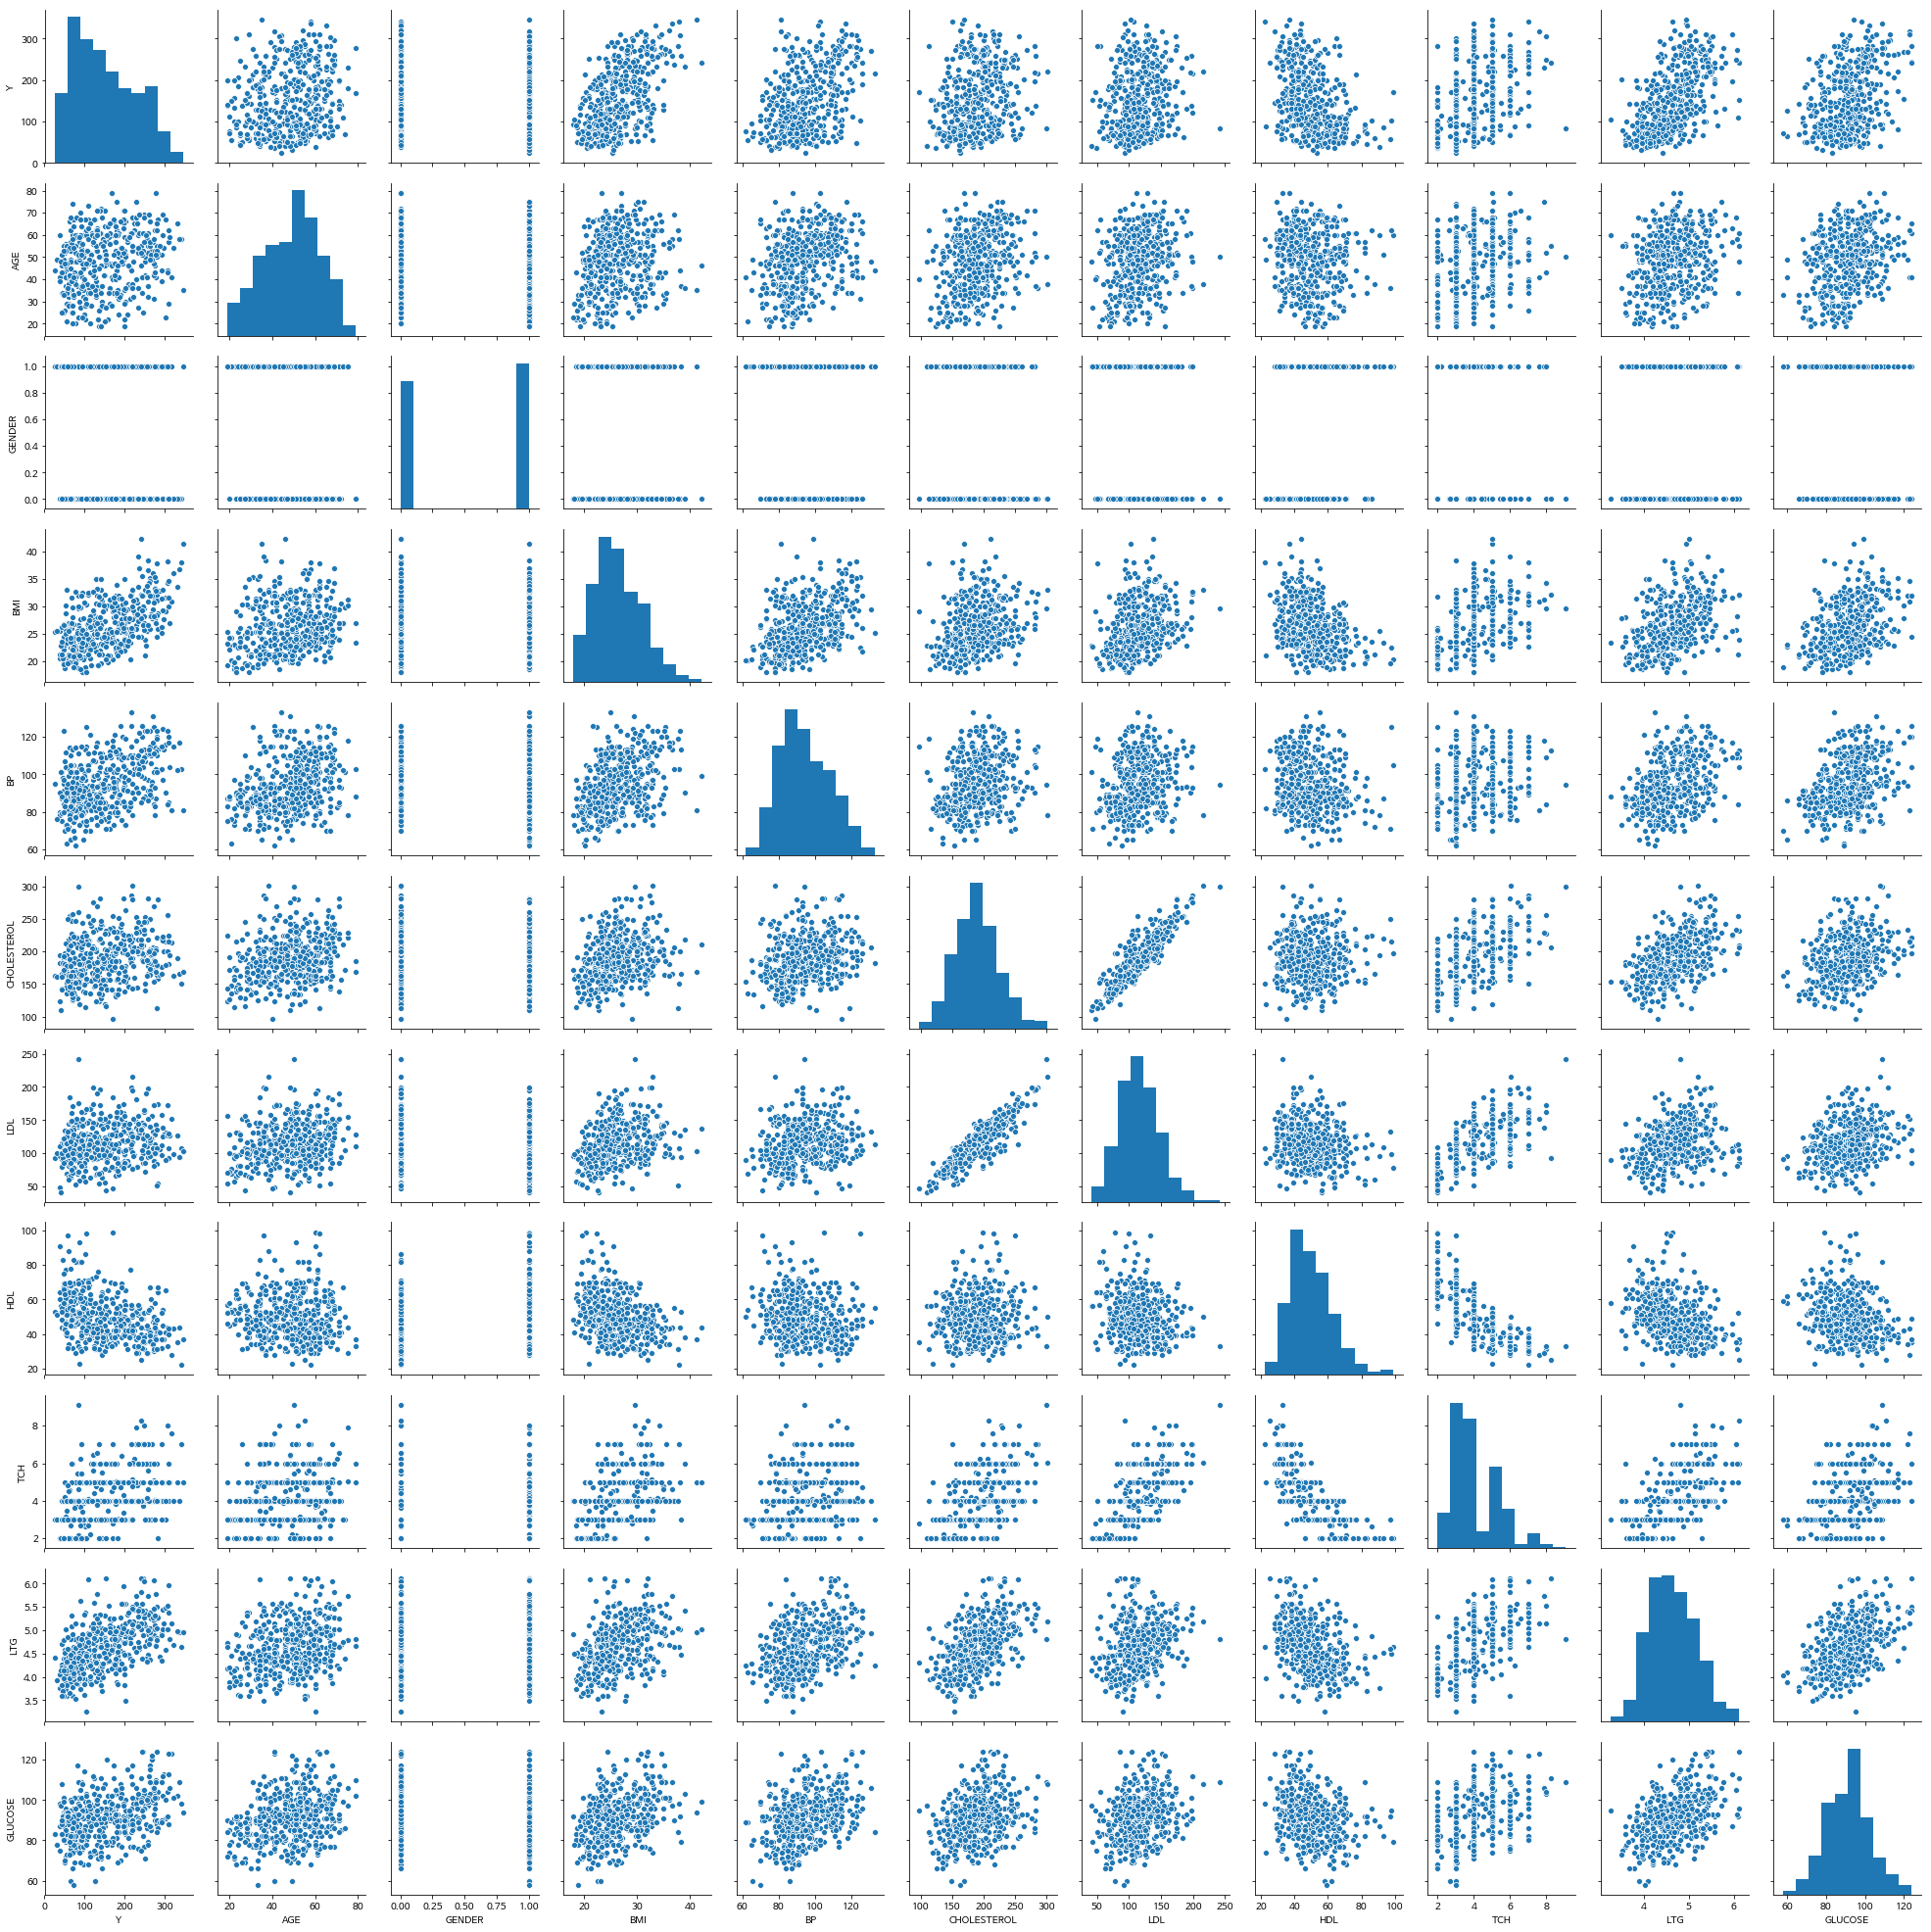

In [16]:
sns.pairplot(ds_DIA)

# 3. 변수 간의 경향성 파악 - 상관관계 분석

In [17]:
# 상관 관계 분석
ds_DIA.corr().round(3)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.188,-0.043,0.586,0.441,0.212,0.174,-0.395,0.430,0.566,0.382
AGE,0.188,1.000,-0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302
GENDER,-0.043,-0.174,1.000,-0.088,-0.241,-0.035,-0.143,0.379,-0.332,-0.150,-0.208
BMI,0.586,0.185,-0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389
BP,0.441,0.335,-0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390
CHOLESTEROL,0.212,0.260,-0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326
LDL,0.174,0.219,-0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291
HDL,-0.395,-0.075,0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274
TCH,0.430,0.204,-0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417
LTG,0.566,0.271,-0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465


# 전체 모델에 대한 평판을 알아보자

In [18]:
# 회귀 모델 생성
reg_multi_model = sm.OLS(ds_DIA_y, ds_DIA_x_const)
# 적합
reg_multi_results = reg_multi_model.fit()
print(reg_multi_results.summary())
# std err = 표준오차 (조사해보기)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           3.83e-62
Time:                        15:56:57   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -380.2864     67.168     -5.662      

# 회귀 모델 생성 : 전체 설명변수 대상으로 다중 공선성 검토

In [19]:
# 데이터 테이블 생성 -> 값 입력
ds_vif = pd.DataFrame()
# 변수 명 입력
ds_vif["variable"] = ds_DIA_x_const.columns
# variance_inflation_factor 다중공선성 함수, exog : 설명변수 데이터, exog_idx : 변수 인덱스
ds_vif["vif"] = [variance_inflation_factor(ds_DIA_x_const.values,i) for i in range(ds_DIA_x_const.shape[1])]
# VIF 낮은 순 정렬
ds_vif.sort_values("vif",inplace = True)
ds_vif.round(3)

,variable,vif
1,AGE,1.217
2,GENDER,1.278
4,BP,1.459
10,GLUCOSE,1.485
3,BMI,1.509
8,TCH,8.891
9,LTG,10.076
7,HDL,15.402
6,LDL,39.193
5,CHOLESTEROL,59.203


In [25]:
ds_DIA_y = ds_DIA["Y"]
ds_DIA_x = ds_DIA.drop(["Y","CHOLESTEROL"],axis =1, inplace = False)

ds_DIA_x_const = sm.add_constant(ds_DIA_x)
ds_DIA_x_const.head()

,const,AGE,GENDER,BMI,BP,LDL,HDL,TCH,LTG,GLUCOSE
0,1.0,59,0,32.1,101.0,93.2,38.0,4.0,4.8598,87
1,1.0,48,1,21.6,87.0,103.2,70.0,3.0,3.8918,69
2,1.0,72,0,30.5,93.0,93.6,41.0,4.0,4.6728,85
3,1.0,24,1,25.3,84.0,131.4,40.0,5.0,4.8903,89
4,1.0,50,1,23.0,101.0,125.4,52.0,4.0,4.2905,80


In [26]:
# 회귀 모델 생성
reg_multi_model = sm.OLS(ds_DIA_y, ds_DIA_x_const)
# 적합
reg_multi_results = reg_multi_model.fit()
print(reg_multi_results.summary())
# std err = 표준오차 (조사해보기)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     50.71
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           3.06e-62
Time:                        16:01:12   Log-Likelihood:                -2387.8
No. Observations:                 442   AIC:                             4796.
Df Residuals:                     432   BIC:                             4837.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -273.0666     36.592     -7.462      0.0

# 1. 다중공선성이 생기면 안좋다
# 2. 다중공선성은 모델의 R^2을 올린다
# 3. 아무리 R^2가 높다고 좋은것이 아니다
# 4. 그래서 다중공선성이 생기는 변수를 제거해봤다.
# 5. 제거했더니 R^2값은 조금 떨어졌지만 다중공선성을 비교했을 때 값이 10이전으로 떨어진것을 확인했다.
# 6. 따라서 R^2가 조금 낮아져도 vif들이 낮아진 것으로 데이터분석을 시작한다

In [27]:
# 데이터 테이블 생성 -> 값 입력
ds_vif = pd.DataFrame()
# 변수 명 입력
ds_vif["variable"] = ds_DIA_x_const.columns
# variance_inflation_factor 다중공선성 함수, exog : 설명변수 데이터, exog_idx : 변수 인덱스
ds_vif["vif"] = [variance_inflation_factor(ds_DIA_x_const.values,i) for i in range(ds_DIA_x_const.shape[1])]
# VIF 낮은 순 정렬
ds_vif.sort_values("vif",inplace = True)
ds_vif.round(3)

,variable,vif
1,AGE,1.217
2,GENDER,1.275
4,BP,1.457
9,GLUCOSE,1.484
3,BMI,1.502
8,LTG,2.173
5,LDL,2.927
6,HDL,3.737
7,TCH,7.819
0,const,200.592


In [28]:
# RFE(recursive feature elimination) 함수: 입력된 모델을 이용해 변수중요도가 낮은 순으로 순차적 제거
# sklearn의 선형회귀 모델
model = LinearRegression()
# 전체의 변수 중 5개의 변수가 남을 때까지 변수 제거
rfe = RFE(estimator = model, n_features_to_select = 5).fit(ds_DIA_x,ds_DIA_y)
# 선택된 변수
selected_cols = ds_DIA_x.columns[rfe.support_]
# 제거된 변수
removed_cosl = ds_DIA_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables : {}".format(removed_cosl))

Selected Variables : Index(['GENDER', 'BMI', 'HDL', 'TCH', 'LTG'], dtype='object')
Removed Variables : Index(['AGE', 'BP', 'LDL', 'GLUCOSE'], dtype='object')


In [29]:
# 후진제거법에의해 선택된 데이터
ds_DIA_x_rfe = sm.add_constant(ds_DIA_x_const[selected_cols])
# 회귀 모델 생성
reg_multi_rfe_model = sm.OLS(ds_DIA_y, ds_DIA_x_rfe)
# 적합
reg_multi_rfe_results = reg_multi_rfe_model.fit()
print(reg_multi_rfe_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     80.55
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           9.30e-60
Time:                        16:04:13   Log-Likelihood:                -2402.6
No. Observations:                 442   AIC:                             4817.
Df Residuals:                     436   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -215.9474     35.034     -6.164      0.0

# variable 5개만 남긴것을 확인

In [30]:
ds_rfe_vif = pd.DataFrame()
# 변수 명 입력
ds_rfe_vif["variable"] = ds_DIA_x_rfe.columns
# variance_inflation_factor 다중공선성 함수, exog : 설명변수 데이터, exog_idx : 변수 인덱스
ds_rfe_vif["VIF"] = [variance_inflation_factor(ds_DIA_x_rfe.values,i) for i in range(ds_DIA_x_rfe.shape[1])]
# VIF 낮은 순 정렬
ds_rfe_vif.sort_values("VIF",inplace = True)
ds_rfe_vif.round(3)

,variable,VIF
1,GENDER,1.185
2,BMI,1.329
5,LTG,1.778
3,HDL,2.373
4,TCH,3.070
0,const,173.604


C:\Users\admin1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


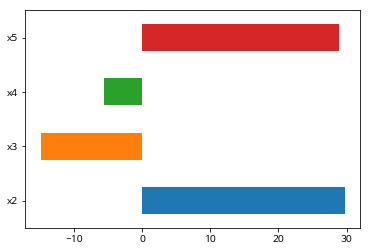

In [31]:
# 표준화 회귀계수가 필요하면 표준화를 먼저 하면된다.
# 데이터 펴준화, 평균 0 표준편차 1
ds_DIA_x_scaled = scale(ds_DIA_x_const[selected_cols])
# 후진제거법에 의해 선택된 데이터에 상수 1 입력
ds_health_x_scaled=sm.add_constant(ds_DIA_x_scaled)
#  회귀 모델 생성
reg_multi_rfe_model = sm.OLS(ds_DIA_y,ds_DIA_x_scaled)
# 적합
reg_multi_scaled_results = reg_multi_rfe_model.fit()
# 설명변수 중요도
ds_reg_scaled_coef = pd.DataFrame({"Coef" : reg_multi_scaled_results.params.values[1:]},index=reg_multi_rfe_model.exog_names[1:])
ds_reg_scaled_coef.plot.barh(y="Coef",legend=False)

In [32]:
ds_DIA_x_scaled = scale(ds_DIA_x_const[selected_cols])
ds_DIA_x_scaled = sm.add_constant(ds_DIA_x_scaled)
reg_multi_scaled_model = sm.OLS(ds_DIA_y, ds_DIA_x_scaled)
reg_multi_scaled_results = reg_multi_scaled_model.fit()
ds_reg_scaled_coef = pd.DataFrame({"Coef":reg_multi_scaled_results.params.values[1:]}, index = reg_multi_rfe_model.exog_names[1:])
ds_reg_scaled_coef.plot.barh(y = "Coef",legend = False)

C:\Users\admin1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


ValueError: Shape of passed values is (1, 5), indices imply (1, 4)

In [ ]:
import sys
while 1:
    _ = input()
    if _ == '': break;
    for i in _:
        _ = _.replace('BUG','')
    print(_)

print "No bugs here..."
print "No bugs here..."
void hello() {
void hello() {
print "No bugs here..."  void hello() { BUGBUG printfBUG("Hello, world!\n"); }  wriBUGBUGtelBUGn("Hello B-U-G");
print "No bugs here..."  void hello() {  printf("Hello, world!\n"); }  writeln("Hello B-U-G");
